## Корреляционный анализ

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Quiestion 1

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [3]:
data = pd.read_csv('water.txt', sep='\t')
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


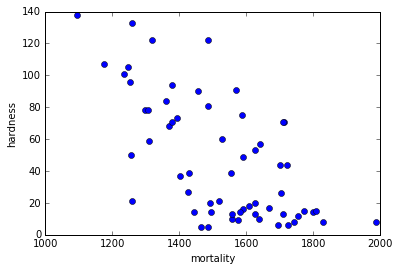

In [4]:
pylab.plot(data.loc[:, 'mortality'], data.loc[:, 'hardness'], 'o')
pylab.xlabel('mortality')
pylab.ylabel('hardness')
pylab.show()

In [5]:
data.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


### Question 2

В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [6]:
data.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


### Question 3

Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [7]:
data_south = data[data.location == 'South']
data_north = data[data.location == 'North']

In [8]:
data_south.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [9]:
data_north.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


### Question 4

Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [10]:
def corr_matthews(a, b, c, d):
    return float(a*d - b*c) / np.sqrt((a+b)*(a+c)*(b+d)*(c+d))

In [11]:
corr_matthews = corr_matthews(239.0, 515.0, 203.0, 718.0)
corr_matthews

0.10900237458678963

### Question 5

В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [12]:
stats.chi2_contingency([[239.0, 515.0], [203.0, 718.0]])

(19.407530788543038,
 1.0558987006638725e-05,
 1L,
 array([[ 198.96597015,  555.03402985],
        [ 243.03402985,  677.96597015]]))

### Question 6

В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [13]:
a = 239.0
c = 515.0

b = 203.0
d = 718.0

n1 = a + c
n2 = b + d

In [14]:
alpha = 0.05
z = stats.norm.ppf(1 - alpha / 2.)

p1 = float(a/n1)
p2 = float(b/n2)

left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)

print (left_boundary, right_boundary)

(0.053905233215813156, 0.13922183141523897)


### Question 7

Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [15]:
P = float(p1*n1 + p2*n2) / (n1 + n2)

z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
print "z-stat: ", z_stat

z-stat:  4.46111444482


In [16]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [17]:
print "p-value: ", proportions_diff_z_test(z_stat, alternative='two-sided')

p-value:  8.15345308958e-06


### Question 8

Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

                    Не доволен    Более или менее    Доволен

Не очень счастлив:   197	-          111	      -       33

Достаточно счастлив:	382	-          685	     -        331

Очень счастлив:	    110	   -       342	   -          333

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [18]:
data = [[197, 111, 33], [382, 685, 331], [110, 342, 333]]
stat = stats.chi2_contingency(data)
stat_chi2 = stat[0]
print "stat chi2: %.4f" % stat_chi2

stat chi2: 293.6831


### Question 9

На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [19]:
print "p-value: ", stat[1]

p-value:  2.49642995801e-62


### Question 10


Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [20]:
K1 = 3
K2 = 3
n = sum(data)

coeff_V = np.sqrt(stat_chi2 / float(n * (np.min([K1, K2]) - 1)))
coeff_V

0.2412013934500338